# Global Land-Ocean Temperature Anomalies
Throughout the years, the planet has gotten progressively hotter, with the hottest temperatures happening fairly recently. The Global Land-Ocean Index measures the average monthly temperature of both the land and ocean, then finds anomalies within its measurements. Plotting the data should allow noticable trends to appear, with the most notable being when global temperature starts to increase. Finding the outliers within the data set will display where the most extreme anomalies lay. 

In [29]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import ipywidgets as widgets
import seaborn as sns

%matplotlib inline

In [30]:
# Read and organize the data
f=open('GOT.txt','r')
for line in f:
    print(line.strip())
f.close()



GLOBAL Land-Ocean Temperature Index in 0.01 degrees Celsius   base period: 1951-1980

sources:  GHCN-v3 1880-07/2019 + SST: ERSST v5 1880-07/2019
using elimination of outliers and homogeneity adjustment
Notes: 1950 DJF = Dec 1949 - Feb 1950 ;  ***** = missing

AnnMean
Year   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec    J-D D-N    DJF  MAM  JJA  SON  Year
1880   -29  -18  -11  -20  -12  -23  -21   -9  -16  -23  -20  -23    -19 ***   ****  -14  -18  -20  1880
1881   -16  -17    4    4    2  -20   -7   -3  -14  -21  -22  -11    -10 -11    -18    3  -10  -19  1881
1882    14   15    3  -19  -16  -26  -21   -6  -10  -25  -16  -25    -11 -10      6  -10  -17  -17  1882
1883   -32  -39  -13  -17  -20  -13   -8  -15  -21  -14  -22  -16    -19 -20    -32  -17  -12  -19  1883
1884   -16   -8  -37  -43  -37  -41  -35  -26  -27  -24  -30  -29    -29 -28    -13  -39  -34  -27  1884
1885   -59  -30  -25  -42  -42  -44  -36  -32  -24  -19  -20   -5    -32 -34    -39  -37  -37  -21  1

In [31]:
inf="GOT.txt"
of="cleaned_file.txt"

dl=["Year", "Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug","Sep", "Oct", "Nov","Dec", "J-D","D-N","DJF", "MAM", "JJA", "SON"]
fin=open(inf)
fout=open(of, "w+")

for line in fin:
    for word in dl:
        line=line.replace(word, "")
    fout.write(line)
fin.close()
fout.close()

g=open('cleaned_file.txt','r')
#First 7 non data lines cut:
g.readline()
g.readline()
g.readline()
g.readline()
g.readline()
g.readline()
g.readline()

for line in g:
    print(line.strip())
g.close()




1880   -29  -18  -11  -20  -12  -23  -21   -9  -16  -23  -20  -23    -19 ***   ****  -14  -18  -20  1880
1881   -16  -17    4    4    2  -20   -7   -3  -14  -21  -22  -11    -10 -11    -18    3  -10  -19  1881
1882    14   15    3  -19  -16  -26  -21   -6  -10  -25  -16  -25    -11 -10      6  -10  -17  -17  1882
1883   -32  -39  -13  -17  -20  -13   -8  -15  -21  -14  -22  -16    -19 -20    -32  -17  -12  -19  1883
1884   -16   -8  -37  -43  -37  -41  -35  -26  -27  -24  -30  -29    -29 -28    -13  -39  -34  -27  1884
1885   -59  -30  -25  -42  -42  -44  -36  -32  -24  -19  -20   -5    -32 -34    -39  -37  -37  -21  1885
1886   -42  -45  -39  -28  -26  -39  -22  -34  -26  -29  -31  -27    -32 -31    -31  -31  -32  -29  1886
1887   -73  -52  -34  -39  -32  -24  -23  -32  -23  -33  -23  -34    -35 -35    -51  -35  -27  -26  1887
1888   -38  -36  -41  -22  -22  -18   -9  -16  -10    2    1   -6    -18 -20    -36  -29  -14   -2  1888
1889   -11   19    8    7   -2  -14  -10  -20  -22  -2

# Data Set
A data set from: https://data.giss.nasa.gov/gistemp/. 
This data set shows the average global temperature anomalies between the surfaces of the lands and the surfaces of the oceans. It uses the temperatures from the years 1951-1980 as the normal temperature. If temperatures stray too far away from the normal temperature, then the recorded temperature difference is recorded into the data set.

In [32]:
z=open('GOT1.txt','r')
z.readline()

for line in z:
    print(line.strip())
z.close()

z=open('GOT1.txt','r')

for line in z:
    Y,j1,f1,m1,a1,m2,j2,j3,a2,s1,o1,n1,d1=np.loadtxt('GOT1.txt', unpack=True)

z.close()

#Organized Data Set

1880   -29  -18  -11  -20  -12  -23  -21   -9  -16  -23  -20  -23
1881   -16  -17    4    4    2  -20   -7   -3  -14  -21  -22  -11
1882    14   15    3  -19  -16  -26  -21   -6  -10  -25  -16  -25
1883   -32  -39  -13  -17  -20  -13   -8  -15  -21  -14  -22  -16
1884   -16   -8  -37  -43  -37  -41  -35  -26  -27  -24  -30  -29
1885   -59  -30  -25  -42  -42  -44  -36  -32  -24  -19  -20   -5
1886   -42  -45  -39  -28  -26  -39  -22  -34  -26  -29  -31  -27
1887   -73  -52  -34  -39  -32  -24  -23  -32  -23  -33  -23  -34
1888   -38  -36  -41  -22  -22  -18   -9  -16  -10    2    1   -6
1889   -11   19    8    7   -2  -14  -10  -20  -22  -22  -33  -30
1890   -44  -45  -40  -37  -45  -27  -27  -38  -39  -24  -48  -31
1891   -42  -47  -19  -28  -18  -20  -20  -16  -14  -21  -35   -4
1892   -28  -12  -35  -35  -25  -23  -32  -25  -13  -13  -42  -39
1893   -80  -54  -23  -30  -36  -29  -16  -27  -20  -17  -17  -35
1894   -54  -33  -25  -48  -35  -44  -26  -22  -25  -21  -25  -20
1895   -44

# Global Mean Land-Ocean Temperature Index
Applying the data set onto a graph, visualizing the data to get a sense towards the trends. 

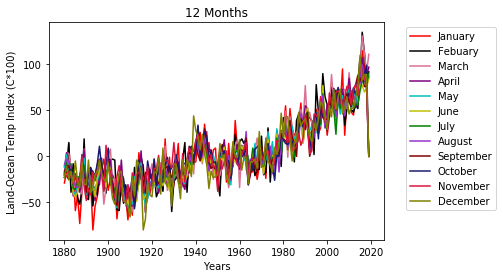

In [33]:
#Plot for the Land-Ocean Index


plt.figure()
plt.plot(Y,j1, 'r', label='January')
plt.plot(Y,f1, 'k', label='Febuary')
plt.plot(Y,m1, 'palevioletred', label='March')
plt.plot(Y,a1, 'purple', label='April')
plt.plot(Y,m2, 'c', label='May')
plt.plot(Y,j2, 'y', label='June')
plt.plot(Y,j3, 'g', label='July')
plt.plot(Y,a2, 'darkorchid', label='August')
plt.plot(Y,s1, 'maroon', label='September')
plt.plot(Y,o1, 'midnightblue', label='October')
plt.plot(Y,n1, 'crimson', label='November')
plt.plot(Y,d1, 'olive', label='December')
plt.xlabel('Years')
plt.ylabel('Land-Ocean Temp Index (C*100)')
plt.title('12 Months')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()




# Scatter Plots
Various scatter plots for all twelve months throughout the years. The individual scatter plots makes finding outliers within the anomalies more noticable. 

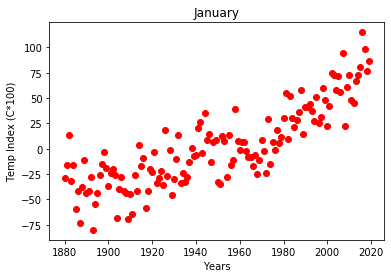

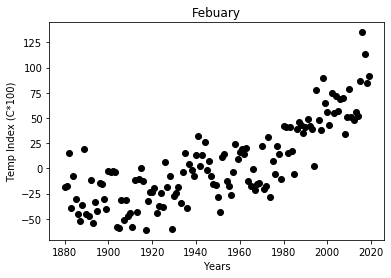

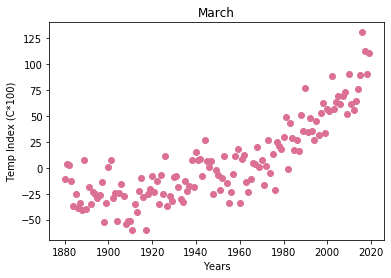

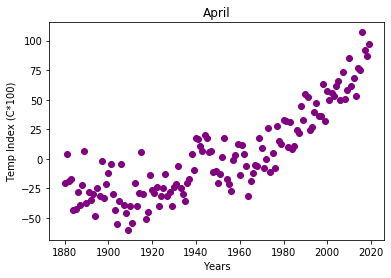

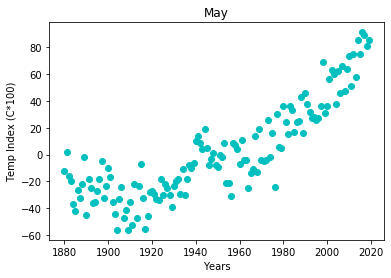

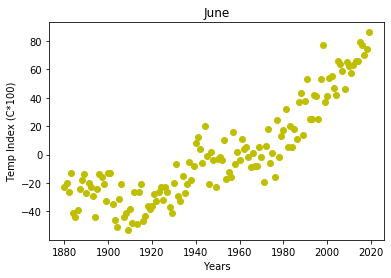

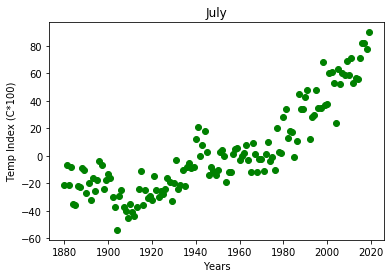

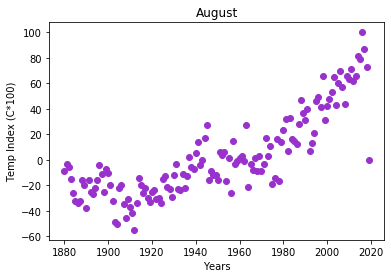

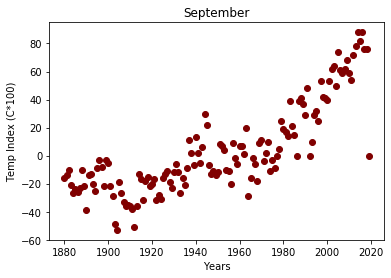

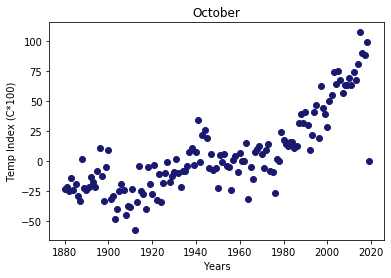

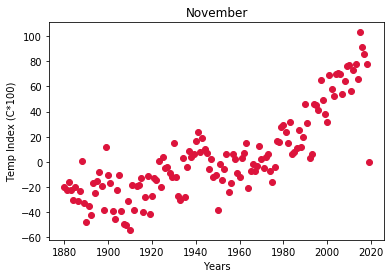

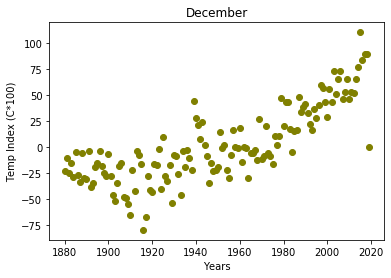

In [34]:
plt.figure()
plt.scatter(Y,j1,color='r')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('January')
plt.show()

plt.figure()
plt.scatter(Y,f1,color='k')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('Febuary')
plt.show()

plt.figure()
plt.scatter(Y,m1,color='palevioletred')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('March')
plt.show()

plt.figure()
plt.scatter(Y,a1,color='purple')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('April')
plt.show()

plt.figure()
plt.scatter(Y,m2,color='c')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('May')
plt.show()

plt.figure()
plt.scatter(Y,j2,color='y')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('June')
plt.show()

plt.figure()
plt.scatter(Y,j3,color='g')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('July')
plt.show()

plt.figure()
plt.scatter(Y,a2,color='darkorchid')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('August')
plt.show()

plt.figure()
plt.scatter(Y,s1,color='maroon')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('September')
plt.show()

plt.figure()
plt.scatter(Y,o1,color='midnightblue')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('October')
plt.show()

plt.figure()
plt.scatter(Y,n1,color='crimson')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('November')
plt.show()

plt.figure()
plt.scatter(Y,d1,color='olive')
plt.xlabel('Years')
plt.ylabel('Temp Index (C*100)')
plt.title('December')
plt.show()



# Box Plots
Box plots for all twelve months. These box plots show how many outliers lay and where they are roughly located. 

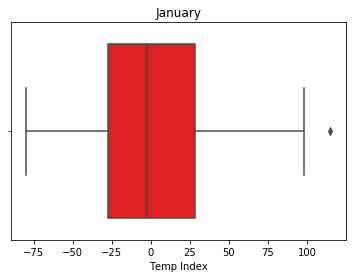

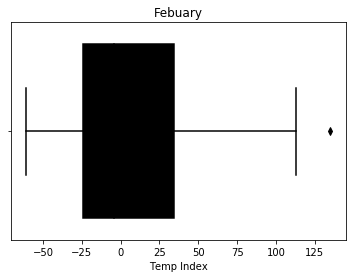

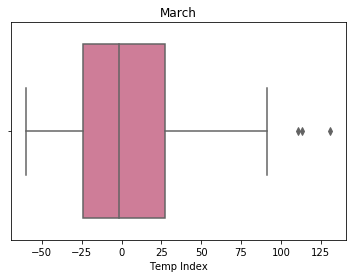

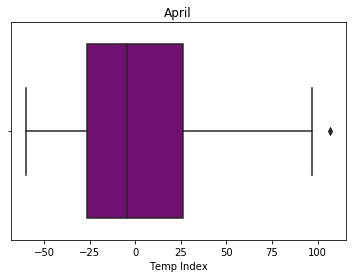

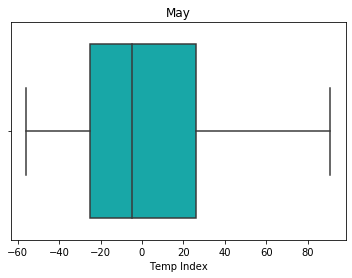

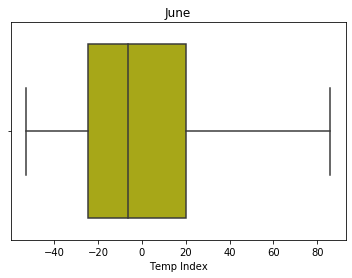

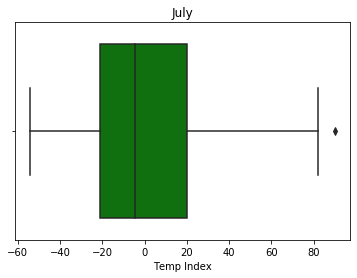

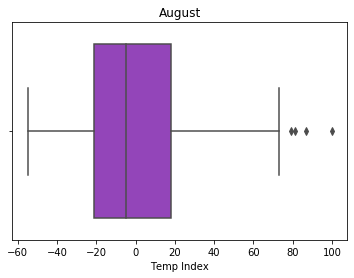

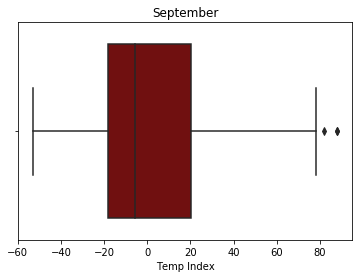

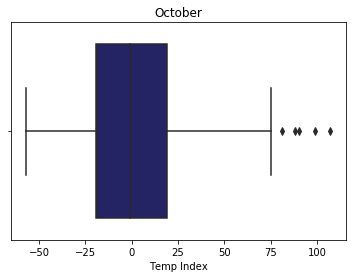

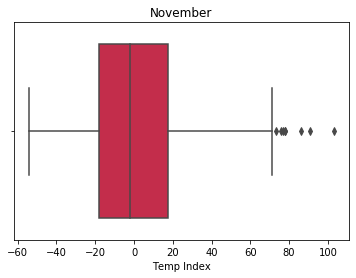

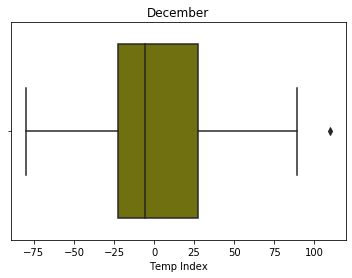

In [35]:
#Graphical Outliers sorted by month

plt.figure()
sns.boxplot(j1,color='r')
plt.xlabel('Temp Index')
plt.title('January')
plt.show()

plt.figure()
sns.boxplot(f1,color='k')
plt.xlabel('Temp Index')
plt.title('Febuary')
plt.show()

plt.figure()
sns.boxplot(m1,color='palevioletred')
plt.xlabel('Temp Index')
plt.title('March')
plt.show()

plt.figure()
sns.boxplot(a1,color='purple')
plt.xlabel('Temp Index')
plt.title('April')
plt.show()

plt.figure()
sns.boxplot(m2,color='c')
plt.xlabel('Temp Index')
plt.title('May')
plt.show()

plt.figure()
sns.boxplot(j2,color='y')
plt.xlabel('Temp Index')
plt.title('June')
plt.show()

plt.figure()
sns.boxplot(j3,color='g')
plt.xlabel('Temp Index')
plt.title('July')
plt.show()

plt.figure()
sns.boxplot(a2,color='darkorchid')
plt.xlabel('Temp Index')
plt.title('August')
plt.show()

plt.figure()
sns.boxplot(s1,color='maroon')
plt.xlabel('Temp Index')
plt.title('September')
plt.show()

plt.figure()
sns.boxplot(o1,color='midnightblue')
plt.xlabel('Temp Index')
plt.title('October')
plt.show()

plt.figure()
sns.boxplot(n1,color='crimson')
plt.xlabel('Temp Index')
plt.title('November')
plt.show()

plt.figure()
sns.boxplot(d1,color='olive')
plt.xlabel('Temp Index')
plt.title('December')
plt.show()



# Standard data regarding the years and their anomalies within the months

In [36]:
print('Mean, Standard Deviatioon, and Correlation Coefficient between Months and Years:')
print('\t','January:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(j1)))
print('\t','\t','Std: {0:.3}'.format(np.std(j1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,j1)[0,1])
print('\n')
print('\t','Febuary:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(f1)))
print('\t','\t','Std: {0:.3}'.format(np.std(f1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,f1)[0,1])
print('\n')
print('\t','March:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(m1)))
print('\t','\t','Std: {0:.3}'.format(np.std(m1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,m1)[0,1])
print('\n')
print('\t','April:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(a1)))
print('\t','\t','Std: {0:.3}'.format(np.std(a1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,a1)[0,1])
print('\n')
print('\t','May:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(m2)))
print('\t','\t','Std: {0:.3}'.format(np.std(m2)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,m2)[0,1])
print('\n')
print('\t','June:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(j2)))
print('\t','\t','Std: {0:.3}'.format(np.std(j2)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,j2)[0,1])
print('\n')
print('\t','July:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(j3)))
print('\t','\t','Std: {0:.3}'.format(np.std(j3)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,j3)[0,1])
print('\n')
print('\t','August:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(a2)))
print('\t','\t','Std: {0:.3}'.format(np.std(a2)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,a2)[0,1])
print('\n')
print('\t','September:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(s1)))
print('\t','\t','Std: {0:.3}'.format(np.std(s1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,s1)[0,1])
print('\n')
print('\t','October:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(o1)))
print('\t','\t','Std: {0:.3}'.format(np.std(o1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,o1)[0,1])
print('\n')
print('\t','November:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(n1)))
print('\t','\t','Std: {0:.3}'.format(np.std(n1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,n1)[0,1])
print('\n')
print('\t','December:')
print('\t','\t','Mean: {0:.3}'.format(np.mean(d1)))
print('\t','\t','Std: {0:.3}'.format(np.std(d1)))
print('\t','\t','Correlation Coefficient:',np.corrcoef(Y,d1)[0,1])
print('\n')

Mean, Standard Deviatioon, and Correlation Coefficient between Months and Years:
	 January:
	 	 Mean: 2.69
	 	 Std: 39.7
	 	 Correlation Coefficient: 0.8349409204254004


	 Febuary:
	 	 Mean: 4.52
	 	 Std: 40.0
	 	 Correlation Coefficient: 0.8001832273263405


	 March:
	 	 Mean: 5.86
	 	 Std: 39.6
	 	 Correlation Coefficient: 0.8257936167429367


	 April:
	 	 Mean: 3.17
	 	 Std: 37.1
	 	 Correlation Coefficient: 0.8475584520855111


	 May:
	 	 Mean: 2.05
	 	 Std: 35.4
	 	 Correlation Coefficient: 0.8561450870968927


	 June:
	 	 Mean: 0.757
	 	 Std: 34.6
	 	 Correlation Coefficient: 0.875472043704522


	 July:
	 	 Mean: 3.08
	 	 Std: 32.5
	 	 Correlation Coefficient: 0.8578123025421804


	 August:
	 	 Mean: 3.0
	 	 Std: 33.0
	 	 Correlation Coefficient: 0.8290808612727468


	 September:
	 	 Mean: 4.03
	 	 Std: 32.3
	 	 Correlation Coefficient: 0.8240398711015481


	 October:
	 	 Mean: 5.91
	 	 Std: 33.4
	 	 Correlation Coefficient: 0.8082277472848899


	 November:
	 	 Mean: 4.71
	 	 St

# Identifying the outliers from the box plots
Like seen with the twelve box plots, all months have at least one outlier except for May and June. Finding the exact values of the outliers will tell us when the extreme values of the anomalies happened, possibly showing a trend. 

In [37]:

# Jan
Q1=np.percentile(j1,25)
Q3=np.percentile(j1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier=[]
for x in j1:
    if ((x>ul) or (x<ll)):
        outlier.append(x)
print('Outlier in January is', outlier)
print('\n')

#Feb

Q1=np.percentile(f1,25)
Q3=np.percentile(f1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier1=[]
for x in f1:
    if ((x>ul) or (x<ll)):
        outlier1.append(x)
print('Outlier in Febuary is', outlier1)
print('\n')

#Mar

Q1=np.percentile(m1,25)
Q3=np.percentile(m1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier2=[]
for x in m1:
    if ((x>ul) or (x<ll)):
        outlier2.append(x)
print('Outlier in March is', outlier2)
print('\n')

#Apr

Q1=np.percentile(a1,25)
Q3=np.percentile(a1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier3=[]
for x in a1:
    if ((x>ul) or (x<ll)):
        outlier3.append(x)
print('Outlier in April is', outlier3)
print('\n')

#May

Q1=np.percentile(m2,25)
Q3=np.percentile(m2,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier4=[]
for x in m2:
    if ((x>ul) or (x<ll)):
        outlier4.append(x)
print('Outlier in May is', outlier4)
print('\n')

#Jun

Q1=np.percentile(j2,25)
Q3=np.percentile(j2,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier5=[]
for x in j2:
    if ((x>ul) or (x<ll)):
        outlier5.append(x)
print('Outlier in June is', outlier5)
print('\n')

#Jul


Q1=np.percentile(j3,25)
Q3=np.percentile(j3,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier6=[]
for x in j3:
    if ((x>ul) or (x<ll)):
        outlier6.append(x)
print('Outlier in July is', outlier6)
print('\n')

#Aug

Q1=np.percentile(a2,25)
Q3=np.percentile(a2,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier7=[]
for x in a2:
    if ((x>ul) or (x<ll)):
        outlier7.append(x)
print('Outlier in August is', outlier7)
print('\n')

#Sep

Q1=np.percentile(s1,25)
Q3=np.percentile(s1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier8=[]
for x in s1:
    if ((x>ul) or (x<ll)):
        outlier8.append(x)
print('Outlier in September is', outlier8)
print('\n')

#Oct

Q1=np.percentile(o1,25)
Q3=np.percentile(o1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier9=[]
for x in o1:
    if ((x>ul) or (x<ll)):
        outlier9.append(x)
print('Outlier in October is', outlier9)
print('\n')

#Nov

Q1=np.percentile(n1,25)
Q3=np.percentile(n1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier10=[]
for x in n1:
    if ((x>ul) or (x<ll)):
        outlier10.append(x)
print('Outlier in November is', outlier10)
print('\n')

#Dec

Q1=np.percentile(d1,25)
Q3=np.percentile(d1,75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
outlier11=[]
for x in d1:
    if ((x>ul) or (x<ll)):
        outlier11.append(x)
print('Outlier in December is', outlier11)
print('\n')


print('Years with outliers:')
print('\n')
print('Jan: (2016,{} Degrees Celsius)' .format(115/100))
print('Feb: (2016,{} Degrees Celsius)'.format(135/100))
print('Mar: (2016,{} Degrees Celsius)'.format(131/100),',(2017,{} Degrees Celsius)'.format(113/100),',(2019,{} Degrees Celsius)'.format(111/100))
print('Apr: (2016,{} Degrees Celsius)'.format(107/100))
print('Jul: (2019,{})'.format(90/100))
print('Aug: (2014,{} Degrees Celsius)'.format(81/100),',(2016,{} Degrees Celsius)'.format(100/100),',(2017,{} Degrees Celsius)'.format(87/100))
print('Sep: (2014,{} Degrees Celsius)'.format(88/100),',(2015,{} Degrees Celsius)'.format(82/100),',(2016,{} Degrees Celsius)'.format(88/100))
print('Oct: (2014,{} Degrees Celsius)'.format(81/100),',(2015,{} Degrees Celsius)'.format(107/100),',(2016,{} Degrees Celsius)'.format(90/100),',(2017,{} Degrees Celsius)'.format(88/100),',(2018,{} Degrees Celsius)'.format(99/100))
print('Nov: (2009,{} Degrees Celsius)'.format(76/100),',(2010,{} Degrees Celsius)'.format(77/100),',(2012,{} Degrees Celsius)'.format(73/100),',(2013,{} Degrees Celsius)'.format(78/100),',(2015,{} Degrees Celsius)'.format(103/100),',(2016,{} Degrees Celsius)'.format(91/100),',(2017,{} Degrees Celsius)'.format(86/100),',(2018,{} Degrees Celsius)'.format(78/100))
print('Dec: (2015,{} Degrees Celsius)'.format(110/100))

Outlier in January is [115.0]


Outlier in Febuary is [135.0]


Outlier in March is [131.0, 113.0, 111.0]


Outlier in April is [107.0]


Outlier in May is []


Outlier in June is []


Outlier in July is [90.0]


Outlier in August is [81.0, 79.0, 100.0, 87.0]


Outlier in September is [88.0, 82.0, 88.0]


Outlier in October is [81.0, 107.0, 90.0, 88.0, 99.0]


Outlier in November is [76.0, 77.0, 73.0, 78.0, 103.0, 91.0, 86.0, 78.0]


Outlier in December is [110.0]


Years with outliers:


Jan: (2016,1.15 Degrees Celsius)
Feb: (2016,1.35 Degrees Celsius)
Mar: (2016,1.31 Degrees Celsius) ,(2017,1.13 Degrees Celsius) ,(2019,1.11 Degrees Celsius)
Apr: (2016,1.07 Degrees Celsius)
Jul: (2019,0.9)
Aug: (2014,0.81 Degrees Celsius) ,(2016,1.0 Degrees Celsius) ,(2017,0.87 Degrees Celsius)
Sep: (2014,0.88 Degrees Celsius) ,(2015,0.82 Degrees Celsius) ,(2016,0.88 Degrees Celsius)
Oct: (2014,0.81 Degrees Celsius) ,(2015,1.07 Degrees Celsius) ,(2016,0.9 Degrees Celsius) ,(2017,0.88 Degrees Celsius) 

# Conclusions
From the years 1850~1960, the average global temperature anomalies of the land and ocean remained somewhat similar, but after this period, the temperature subtly increases. May and June stay within a reasonable range throughout the years, not having very many outliers showing extreme anomalies, while September, October, and November regularly recieve outliers. From the data, the global anomalies have gotten more extreme starting at around 2009, with extreme outliers appearing nowhere before this period. During 2016, almost every month, except for July and December, had an extreme anomaly, making it one of the hottest years compared to the normal period. In the past, the global anomalies tended towards colder temperatures, but as time progressed, the global average slowly increased until extreme differences can now be detected.

In [38]:
#References:

#Covariance: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

#Outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#           https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c

#Widgets(Didn't use in end): https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916
#                            https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

#Plots: https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
#       https://python-graph-gallery.com/python-colors/

#Organizing Data: https://stackoverflow.com/questions/7356043/how-to-delete-specific-strings-from-a-file
#                 https://stackoverflow.com/questions/4710067/how-to-delete-a-specific-line-in-a-file
#                 https://www.vipinajayakumar.com/parsing-text-with-python/